In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('indian-ev-data.csv')

In [3]:
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [5]:
df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [6]:
df['Vehicle Type'].value_counts()

Scooter    39
Bike       11
Name: Vehicle Type, dtype: int64

In [7]:
df['Manufacturer'].value_counts()

Ather Energy            8
Pure EV                 8
Okinawa Autotech        8
Electric Vehicle Co.    6
Bajaj Auto              5
Revolt Motors           4
Ampere Vehicles         4
Hero Motocorp           3
Tork Motors             3
Joy E-Bike              1
Name: Manufacturer, dtype: int64

In [8]:
df2=df.drop(['id','Model','Year of Manufacture'], axis=1)

In [11]:
# To find the best vehicle for ev rental service we can select Range, Charging Time and Price as the deciding factors.

In [12]:
# Finding thr electric vehicle manufacturer that meets all three criteria: highest ‘Range per Charge (km)’, 
# lowest ‘Price’, and lowest ‘Charging Time’
# Sort by 'Range per Charge (km)' in descending order
df_sorted_range = df.sort_values(by='Range per Charge (km)', ascending=False)

# Sort within the top range subset by 'Price' in ascending order
df_sorted_price = df_sorted_range.sort_values(by='Price')

# Sort within the low-price subset by 'Charging Time' in ascending order
df_sorted_final = df_sorted_price.sort_values(by='Charging Time')

# The first row (manufacturer) in 'df_sorted_final' is our winner!
top_manufacturer = df_sorted_final.iloc[0]['Manufacturer']

print(f"The manufacturer with the highest range, lowest price, and quickest charging time is: {top_manufacturer}")


The manufacturer with the highest range, lowest price, and quickest charging time is: Electric Vehicle Co.


In [13]:
df_sorted_final

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
30,31,Joy E-Bike Urbanite X1,Electric Vehicle Co.,Bike,2.2,80,2.5,60000.0,2.0,50.0,2021.0
22,23,Joy e-Ride,Joy E-Bike,Bike,2.2,80,2.5,60000.0,2.0,50.0,2021.0
41,42,Joy E-Bike Urbanite X2,Electric Vehicle Co.,Bike,2.8,90,2.5,70000.0,3.0,60.0,2022.0
48,49,Joy E-Bike Urbanite X3,Electric Vehicle Co.,Bike,2.9,85,2.5,75000.0,3.0,65.0,2022.0
15,16,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
24,25,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
28,29,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
35,36,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
40,41,Okinawa iPraise Pro X,Okinawa Autotech,Scooter,3.0,120,3.0,95000.0,4.0,70.0,2022.0


In [14]:
# Data Visualization

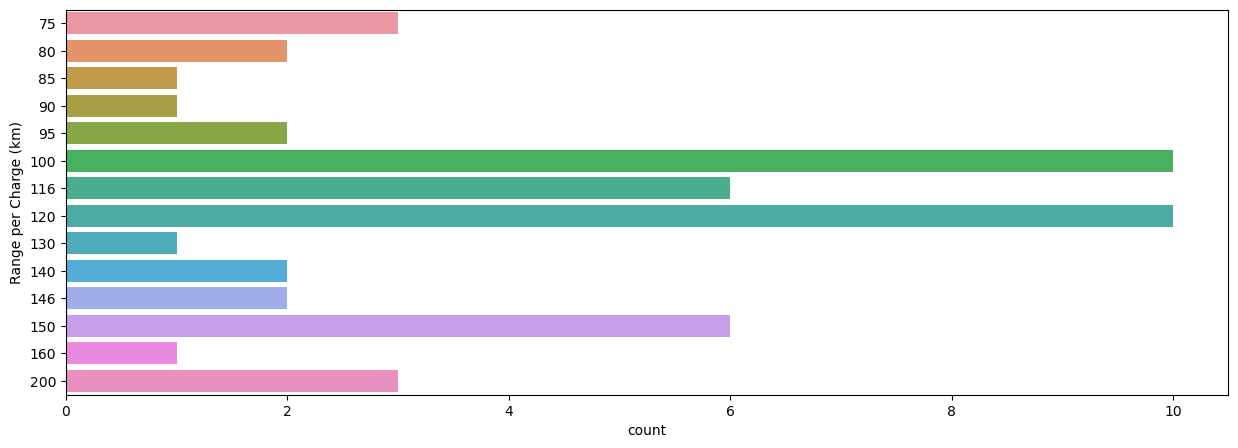

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y='Range per Charge (km)', data=df)
plt.show()

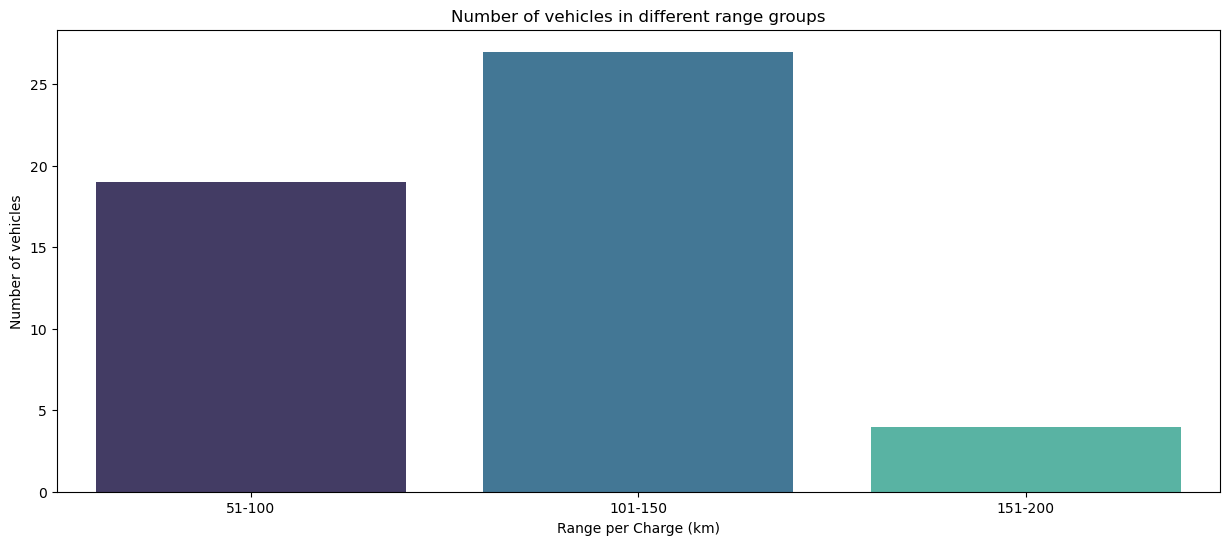

In [17]:
range_51_100=df['Range per Charge (km)'][(df['Range per Charge (km)']>=51) & (df['Range per Charge (km)']<=100)]
range_101_150=df['Range per Charge (km)'][(df['Range per Charge (km)']>=101) & (df['Range per Charge (km)']<=150)]
range_151_200=df['Range per Charge (km)'][(df['Range per Charge (km)']>=151) & (df['Range per Charge (km)']<=200)]

rangex=['51-100','101-150','151-200']
rangey=[len(range_51_100.values),len(range_101_150.values),len(range_151_200.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=rangex, y=rangey, palette='mako')
plt.title("Number of vehicles in different range groups")
plt.xlabel('Range per Charge (km)')
plt.ylabel('Number of vehicles')
plt.show()

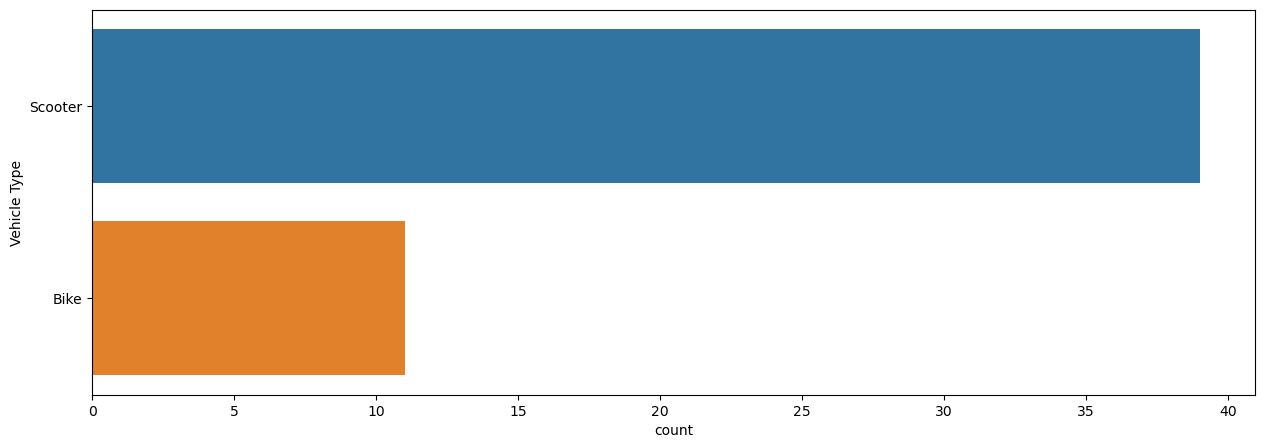

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y='Vehicle Type', data=df)
plt.show()

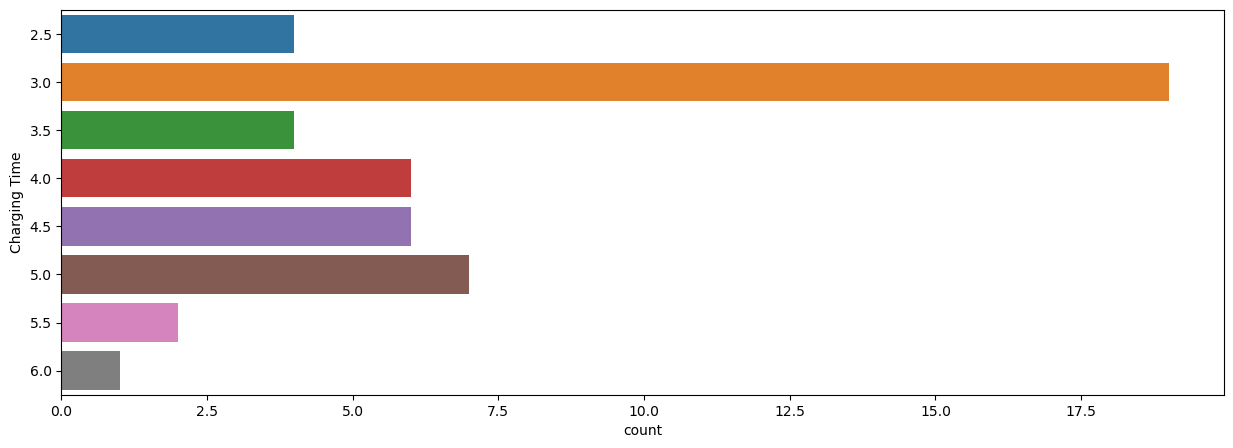

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(y='Charging Time', data=df)

plt.show()


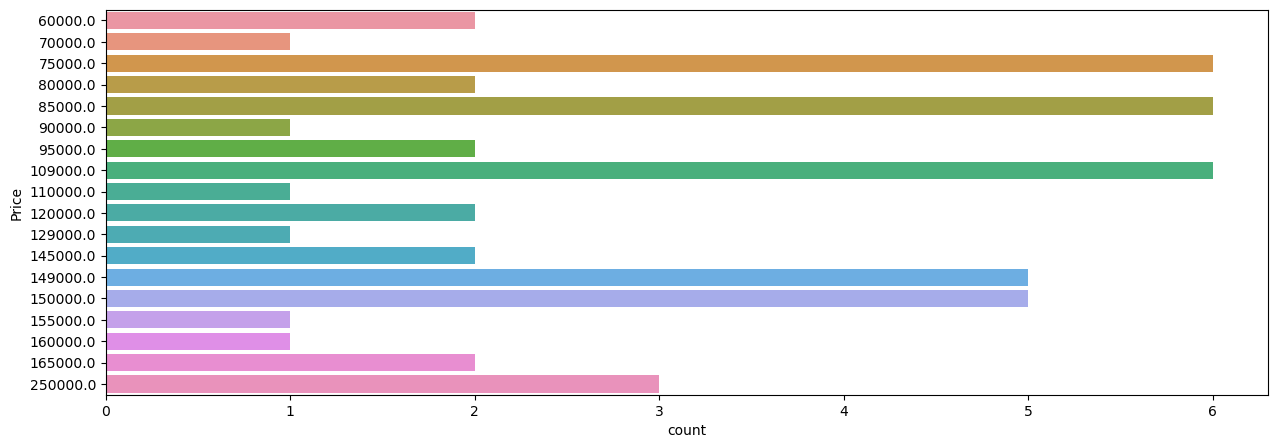

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(y='Price', data=df)
plt.show()

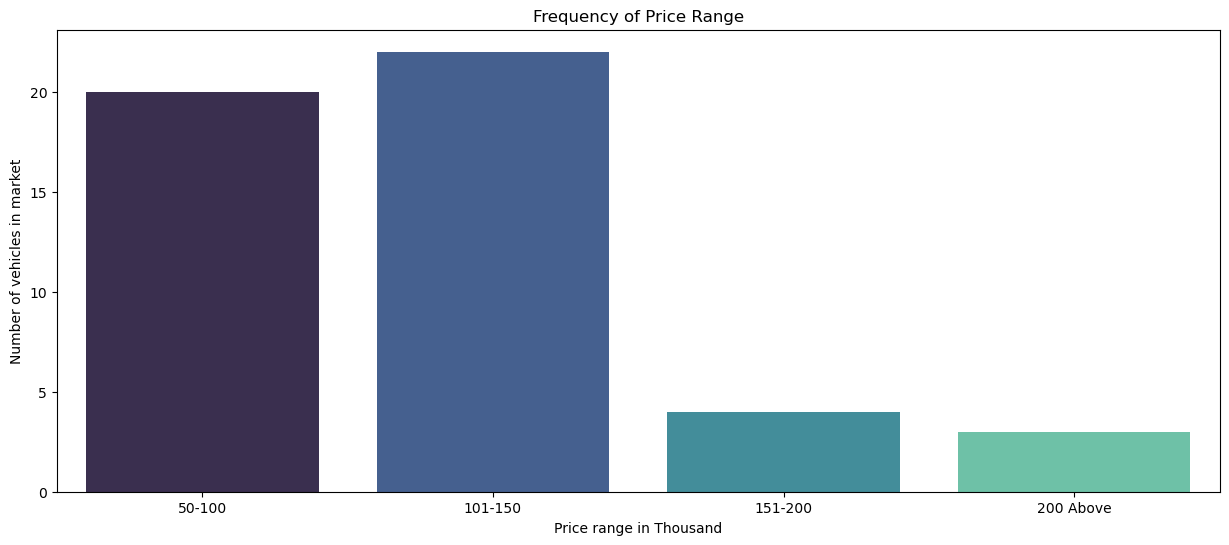

In [24]:
price_05_10=df.Price[(df.Price>=51000) & (df.Price<=100000)]
price_10_15=df.Price[(df.Price>=100001) & (df.Price<=150000)]
price_15_20=df.Price[(df.Price>=150001) & (df.Price<=200000)]
price_20_above=df.Price[(df.Price>=200001)]


pricex=['50-100','101-150','151-200','200 Above']
pricey=[len(price_05_10.values),len(price_10_15.values),len(price_15_20.values),len(price_20_above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=pricex, y=pricey, palette='mako')
plt.title("Frequency of Price Range")
plt.xlabel('Price range in Thousand')
plt.ylabel('Number of vehicles in market')
plt.show()

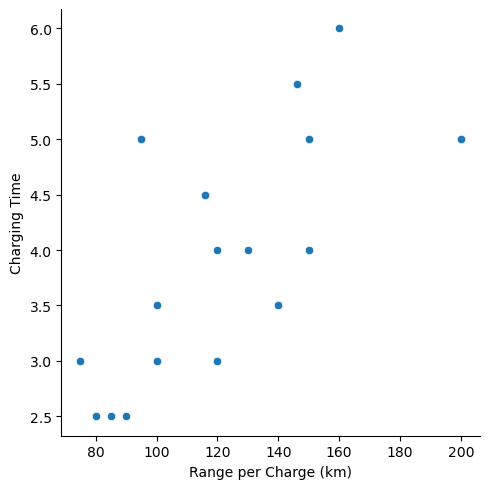

In [25]:
sns.relplot(x='Range per Charge (km)', y='Charging Time', data=df)

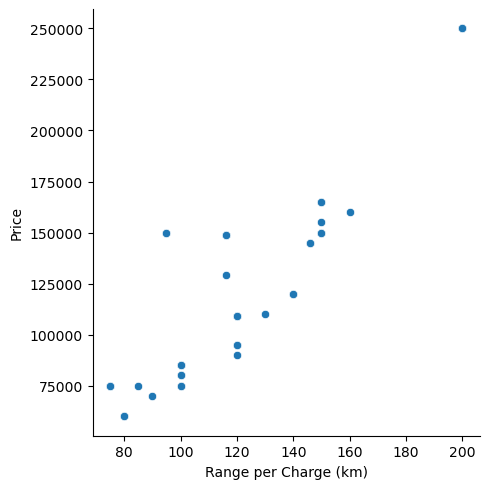

In [26]:
sns.relplot(x='Range per Charge (km)', y='Price', data=df)

In [28]:
df_cleaned = df.dropna()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

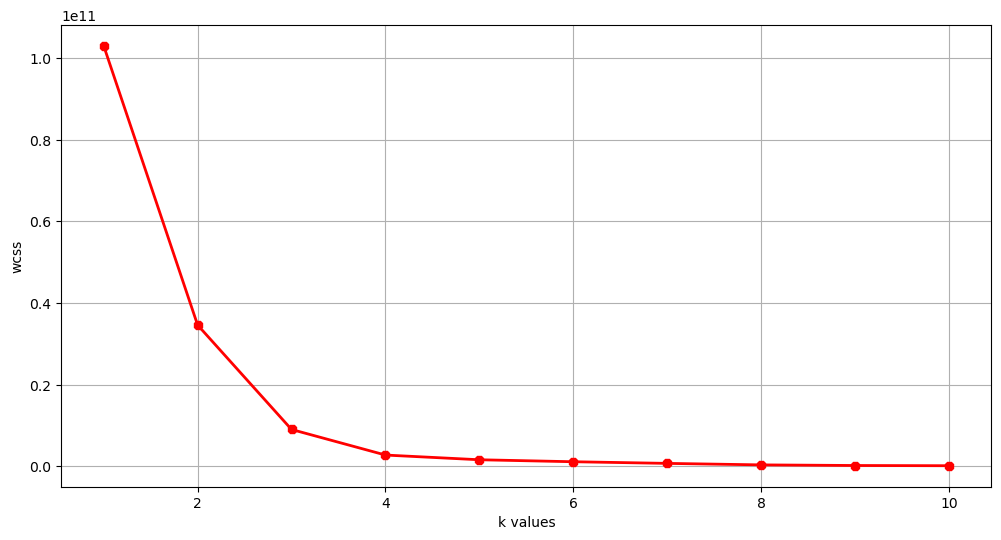

In [29]:
# Clustring wrt Range, Charging Time and Price

x3=df_cleaned.loc[:, ['Range per Charge (km)','Charging Time','Price']].values
from sklearn.cluster import KMeans

wcss=[]

for k in range (1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('k values')
plt.ylabel('wcss')
plt.show()

In [30]:

kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x3)
print(label)

[3 3 2 0 0 1 2 2 2 3 0 0 1 2 2 3 0 0 1 2 0 0 0 2 3 0 2 2 3 0 0 0 2 0 2 3 0
 2 2 3 0 0 0 2 3 2 3 0 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_1612/2306681381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['label']=clusters


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

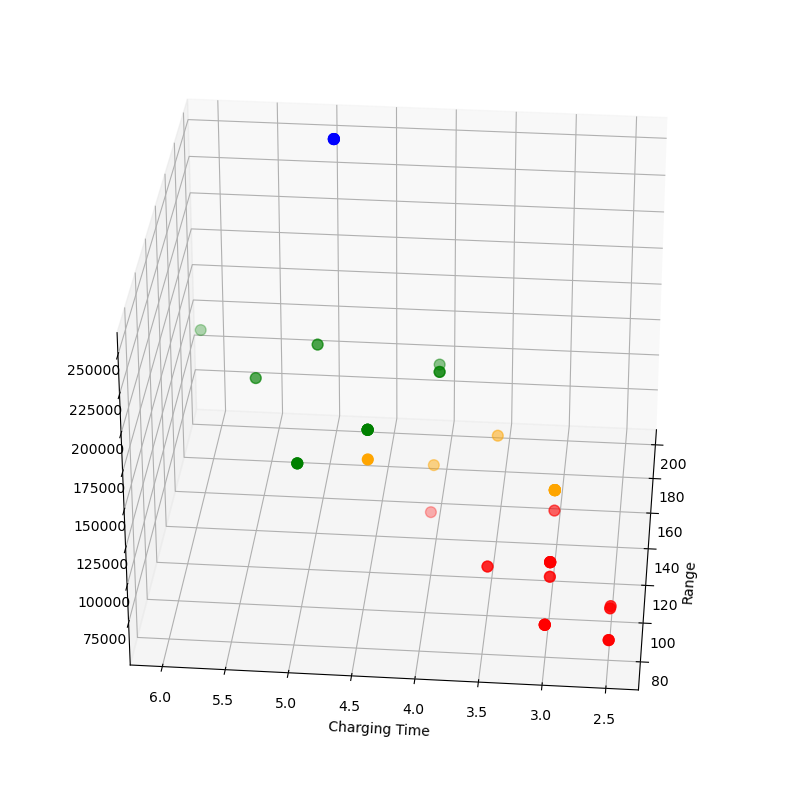

In [33]:
clusters=kmeans.fit_predict(x3)
df_cleaned['label']=clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df_cleaned['Range per Charge (km)'][df_cleaned.label==0], df_cleaned['Charging Time'][df_cleaned.label==0],df_cleaned['Price'][df_cleaned.label==0], c='blue', s=60)
ax.scatter(df_cleaned['Range per Charge (km)'][df_cleaned.label==1], df_cleaned['Charging Time'][df_cleaned.label==1],df_cleaned['Price'][df_cleaned.label==1], c='red', s=60)
ax.scatter(df_cleaned['Range per Charge (km)'][df_cleaned.label==2], df_cleaned['Charging Time'][df_cleaned.label==2],df_cleaned['Price'][df_cleaned.label==2], c='green', s=60)
ax.scatter(df_cleaned['Range per Charge (km)'][df_cleaned.label==3], df_cleaned['Charging Time'][df_cleaned.label==3],df_cleaned['Price'][df_cleaned.label==3], c='orange', s=60)
ax.view_init(30,185)

plt.xlabel('Range')
plt.ylabel('Charging Time')
plt.zlabel('Price')

plt.show()

In [34]:
# Segmenting based on Range and Price

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

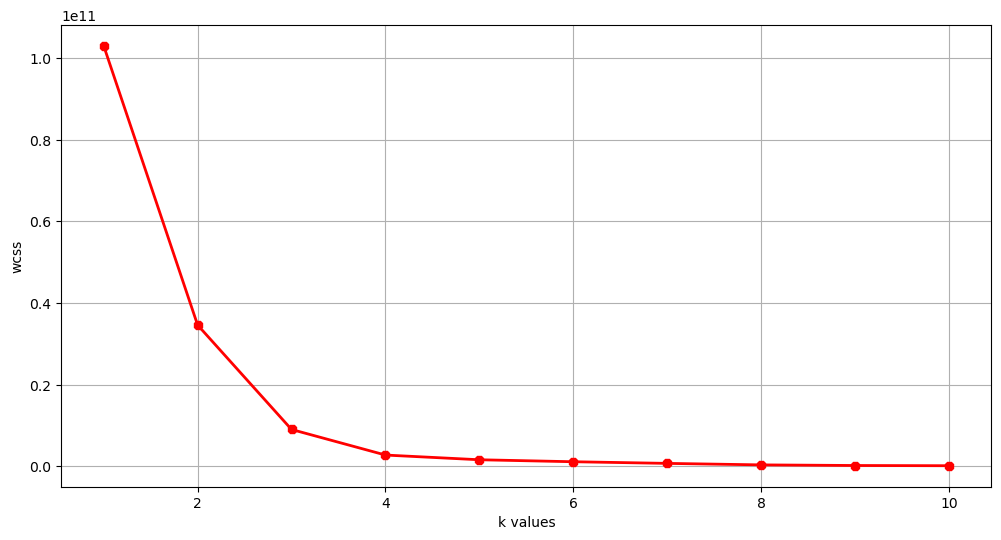

In [35]:
x1=df_cleaned.loc[:, ['Range per Charge (km)','Price']].values


wcss=[]

for k in range (1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('k values')
plt.ylabel('wcss')
plt.show()

In [36]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 3 0 1 1 2 0 0 0 3 1 1 2 0 0 3 1 1 2 0 1 1 1 0 3 1 0 0 3 1 1 1 0 1 0 3 1
 0 0 3 1 1 1 0 3 0 3 1 1]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


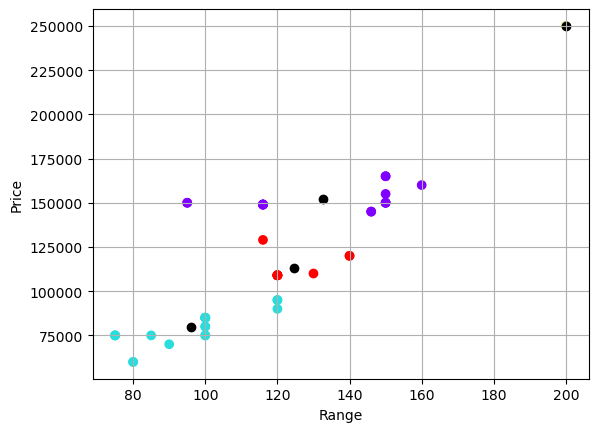

In [37]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Range')
plt.ylabel('Price')
plt.grid()